## 원본 데이터 데이터세트 만들기

이 장은 처음 (주)injewelme에서 받은 원본데이터를 학습 데이터세트를 구축하는 첫 .ipynb이다.
받은 원본데이터는 
1. 서울 소재초등학교 324명 
2. 제주 소재초등학교 84명
이다.

### 원본 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir("..")
path=os.getcwd()

In [3]:
path

'c:\\jupyter\\Explainable Healthcare framework\\Explainable_healthcareframework'

In [4]:
df_seoul=pd.read_excel(path+"\\data\\1.원본 데이터_통합본_서울초.xlsx",sheet_name=None)
df_jeju=pd.read_excel(path+"\\data\\1.원본 데이터_통합본_제주초.xlsx",sheet_name=None)

# # 서울초등학교 일때
# df=df_seoul

# 제주초등학교일때
df=df_seoul

In [5]:
df_user = df['User']
df_body = df['Body']
df_offline = df['오프라인 측정']
# df_mediator = df['중재군 특별미션 정보']
df_stepcount = df['Step Count']
df_exercise = df['Exercise']
df_nutrition= df['Nutrition']
df_sleep= df['Sleep']
# df_rewqrd= df['리워드 데이터']
# df_competition=df['대결 데이터']

# 통합 시트 만들기

### Body 전처리

Height와 Weight 정보를 불러와 동일한 날짜 기준으로 평균값을 정리합니다.
이는 같은 날짜에 서로 다른 시간대에 측정된 데이터가 기록된 경우를 고려하기 위함입니다.

In [6]:
df_body['collect_datetime'] = pd.to_datetime(df_body['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_body = df_body.groupby(['ID', 'collect_datetime']).mean().reset_index()

len(grouped_df_body['ID'].unique())

327

### Stepcount 전처리

stepcount 동일한 날짜 기준으로 값을 SUM 해서 총합으로 정리합니다.

In [7]:
# 통일된 컬럼명을 위해 아래와 같이 이름을 바꿔준다.
df_stepcount.rename(columns={'date': 'collect_datetime','step_count': 'step count'}, inplace=True)

df_stepcount['collect_datetime'] = pd.to_datetime(df_stepcount['collect_datetime']).dt.strftime('%Y-%m-%d')

grouped_df_stepcount= df_stepcount.groupby(['ID', 'collect_datetime']).sum().reset_index()

### Exercise 전처리

운동량인 burned calory는 오타가 있어기에 burned calorie로 수정하였습니다.
또한 동일날짜내에 여러기록이 있는 경우가 있어 날짜별로 groupby를 수행하였고 sum을 진행하였습니다. 

In [8]:
df_exercise=df_exercise[['ID',"date","burned calory(Kcal)"]]
df_exercise.rename(columns={'date': 'collect_datetime','burned calory(Kcal)': 'burned calorie'}, inplace=True)
df_exercise['collect_datetime'] = pd.to_datetime(df_exercise['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_exercise= df_exercise.groupby(['ID', 'collect_datetime']).sum().reset_index()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\2006701501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exercise.rename(columns={'date': 'collect_datetime','burned calory(Kcal)': 'burned calorie'}, inplace=True)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\2006701501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exercise['collect_datetime'] = pd.to_datetime(df_exercise['collect_datetime']).dt.strftime('%Y-%m-%d')


### Nutrition 전처리

칼로리 섭취량도 이름표기 수정  
또한 날짜별 groupby를 해서 칼로리 총합 계산

In [9]:
df_nutrition=df_nutrition[['ID',"date","eat_calory(Kcal)"]]
df_nutrition.rename(columns={'date': 'collect_datetime','eat_calory(Kcal)': 'eat calorie'}, inplace=True)
df_nutrition['collect_datetime'] = pd.to_datetime(df_nutrition['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_nutrition= df_nutrition.groupby(['ID', 'collect_datetime']).sum().reset_index()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\1437399790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutrition.rename(columns={'date': 'collect_datetime','eat_calory(Kcal)': 'eat calorie'}, inplace=True)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\1437399790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutrition['collect_datetime'] = pd.to_datetime(df_nutrition['collect_datetime']).dt.strftime('%Y-%m-%d')


### Sleep 전처리

수면시간도 이름표기 수정  
또한 날짜별 groupby를 해서 수면시간 총합 계산

In [10]:
df_sleep=df_sleep[['ID',"date","total_sleep_minute"]]
df_sleep.rename(columns={'date': 'collect_datetime','total_sleep_minute': 'sleep time'}, inplace=True)
df_sleep['collect_datetime'] = pd.to_datetime(df_sleep['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_sleep= df_sleep.groupby(['ID', 'collect_datetime']).sum().reset_index()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\2146755943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep.rename(columns={'date': 'collect_datetime','total_sleep_minute': 'sleep time'}, inplace=True)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\2146755943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep['collect_datetime'] = pd.to_datetime(df_sleep['collect_datetime']).dt.strftime('%Y-%m-%d')


### 데이터 시트 merge

서울초등학교 실험기간은 2023-09-18~2023-11-12이므로 다음날짜 기간에 해당하는 데이터프레임 만들기  
인원 수 총 327명

In [11]:
# 필터링 기준 날짜 설정
start_date = '2022-07-14'
end_date = '2023-01-11'

In [12]:
len(grouped_df_body['ID'].unique())

327

In [13]:
date_range = pd.date_range(start=start_date, end=end_date)

# 각 ID에 대해 날짜 범위를 반복하여 데이터프레임 생성
data = {
    'ID': np.repeat(grouped_df_body['ID'].unique(),  len(date_range)),
    'collect_datetime': list(date_range) * len(grouped_df_body['ID'].unique())
}

df = pd.DataFrame(data)

In [14]:
# 해당하는 날짜에 각 변수데이터 맵핑: 키, 몸무게, 먹은 칼로리,걸음수,수면시간,태운 칼로리량
grouped_df_body['collect_datetime'] = pd.to_datetime(grouped_df_body['collect_datetime'])
grouped_df_stepcount['collect_datetime'] = pd.to_datetime(grouped_df_stepcount['collect_datetime'])
grouped_df_nutrition['collect_datetime'] = pd.to_datetime(grouped_df_nutrition['collect_datetime'])
grouped_df_exercise['collect_datetime'] = pd.to_datetime(grouped_df_exercise['collect_datetime'])
grouped_df_sleep['collect_datetime'] = pd.to_datetime(grouped_df_sleep['collect_datetime'])

In [15]:
# 전체 하나의 데이터프레임으로 merge
filtered_df = pd.merge(df, grouped_df_body, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_stepcount, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_nutrition, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_exercise, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_sleep, on=['ID', 'collect_datetime'], how='left')

In [16]:
# User 정보 맵핑을 위한 전처리
df_user = df_user.drop(index=0)
# 인덱스를 재설정
df_user = df_user.reset_index(drop=True)
df_user_g=df_user[['ID','gender','grade']]

In [17]:
filtered_df = pd.merge(filtered_df, df_user_g, on='ID', how='left')


## 이탈자 제거

휴리스틱한 방법으로 아래 아이디는 이탈자로 기록(Injewelme 측에서 기록되어 고지)되어 제거

In [18]:
ID_name=['#LTLEKW','#ZFKAAY','#HUPKFW','#HTITUK','#QWBXZB']

In [19]:
filtered_df = filtered_df[~filtered_df['ID'].isin(ID_name)]

In [20]:
filtered_df

,ID,collect_datetime,height,weight,step count,eat calorie,burned calorie,sleep time,gender,grade
0,#AAGQKY,2022-07-14,NaN,NaN,NaN,NaN,NaN,NaN,2,4
1,#AAGQKY,2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,2,4
2,#AAGQKY,2022-07-16,NaN,NaN,NaN,NaN,NaN,NaN,2,4
3,#AAGQKY,2022-07-17,NaN,NaN,NaN,NaN,NaN,NaN,2,4
4,#AAGQKY,2022-07-18,NaN,NaN,NaN,NaN,NaN,NaN,2,4
...,...,...,...,...,...,...,...,...,...,...
59509,#ZZLSSL,2023-01-07,NaN,NaN,NaN,NaN,NaN,NaN,1,6
59510,#ZZLSSL,2023-01-08,NaN,NaN,NaN,NaN,NaN,NaN,1,6
59511,#ZZLSSL,2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,1,6
59512,#ZZLSSL,2023-01-10,NaN,NaN,NaN,NaN,NaN,NaN,1,6


In [21]:
filtered_df.to_csv(path+'\\data\\2.원본데이터 필터링후 전처리 전_서울초.csv',encoding="cp949",index=False)

## 이상치 전처리_from 급식식단정보

위 데이터세트는 서울초등학교의 급식식단 정보(3.서울초_급식식단정보)를 크롤링한 자료를 사용  
사용이유: 모든 일별 데이터를 사용자가 기록하지 못하기 때문에 한끼만 기록하거나 결측치가 있는 경우가 많다    
따라서 한끼만 기록된 경우는 곱하기 3으로 하고 결측일 경우 본 급식정보를 칼로리에서 곱하기 3으로 하려 한다.  

In [22]:
df_dietboard=pd.read_csv(path+"\\data\\3.서울초_급식식단정보.csv")

In [23]:
df_dietboard.head()

,시도교육청코드,시도교육청명,행정표준코드,학교명,식사코드,식사명,급식일자,급식인원수,요리명,원산지정보,칼로리정보,영양정보,수정일자
0,B10,서울특별시교육청,7091458,서울세명초등학교,2,중식,20240430,863.0,꽃씨잡곡밥 (5)<br/>왜된장국 (5.6)<br/>동태포파슬리튀김 (1.2.5.6...,쇠고기(종류) : 국내산(육우)<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기...,599.6 Kcal,탄수화물(g) : 82.2<br/>단백질(g) : 23.9<br/>지방(g) : 1...,20240421
1,B10,서울특별시교육청,7091458,서울세명초등학교,2,중식,20240429,965.0,강황쌀밥 <br/>돈육김치찌개 (5.9.10)<br/>오이부추무침 (13)<br/>...,쇠고기(종류) : 국내산(육우)<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기...,577.7 Kcal,탄수화물(g) : 68.0<br/>단백질(g) : 24.9<br/>지방(g) : 2...,20240421
2,B10,서울특별시교육청,7091458,서울세명초등학교,2,중식,20240426,849.0,통밀밥 (6)<br/>북어국 (1.5.6.13)<br/>매운등갈비찜 (5.6.10....,쇠고기(종류) : 국내산(육우)<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기...,554.0 Kcal,탄수화물(g) : 73.5<br/>단백질(g) : 23.7<br/>지방(g) : 1...,20240421
3,B10,서울특별시교육청,7091458,서울세명초등학교,2,중식,20240425,965.0,발효누룽현미밥 <br/>육개장 (5.6.16)<br/>쑥갓두부무침 (5.6)<br/...,쇠고기(종류) : 국내산(육우)<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기...,551.6 Kcal,탄수화물(g) : 84.3<br/>단백질(g) : 19.1<br/>지방(g) : 1...,20240421
4,B10,서울특별시교육청,7091458,서울세명초등학교,2,중식,20240424,965.0,콩나물밥 (5.16)<br/>바지락조개탕 (13.18)<br/>반반치킨 (2.5.6...,쇠고기(종류) : 국내산(육우)<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기...,630.9 Kcal,탄수화물(g) : 75.2<br/>단백질(g) : 36.3<br/>지방(g) : 1...,20240421


In [24]:
# 필요한 컬럼정보만 남기고 필터링
filtered_df_new=df_dietboard[['학교명','급식일자','요리명','칼로리정보']]

In [25]:
filtered_df_new['급식일자'] = filtered_df_new['급식일자'].astype(str) # 급식일자 일단 string으로 전환 이상한 오류가 datetime에서 뜸
filtered_df_new['급식일자'] = pd.to_datetime(filtered_df_new['급식일자'], format='%Y%m%d') # 급식일자를 년월일로 바꿈
filtered_df_new['칼로리정보'] = filtered_df_new['칼로리정보'].str.replace(r'Kcal', '', regex=True).astype("float") # 칼로리 정보만 추출하기 위래 정규화를 통해 필터링

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\3307377459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_new['급식일자'] = filtered_df_new['급식일자'].astype(str) # 급식일자 일단 string으로 전환 이상한 오류가 datetime에서 뜸
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\3307377459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_new['급식일자'] = pd.to_datetime(filtered_df_new['급식일자'], format='%Y%m%d') # 급식일자를 년월일로 바꿈
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\3307377459.py:3: SettingWithC

In [26]:
### 급식일자 기준으로 merge

In [27]:
merge_cafeteria_kcal=filtered_df_new[['급식일자', '칼로리정보']]

In [28]:
merged_df = pd.merge(filtered_df, merge_cafeteria_kcal,  left_on='collect_datetime', right_on='급식일자', how='left')
merged_df.to_csv(path+"\\data\\4.서울초_급식정보&최종데이터세트.csv",encoding="cp949",index=False)

In [29]:
merged_df.head()

,ID,collect_datetime,height,weight,step count,eat calorie,burned calorie,sleep time,gender,grade,급식일자,칼로리정보
0,#AAGQKY,2022-07-14,NaN,NaN,NaN,NaN,NaN,NaN,2,4,2022-07-14,430.9
1,#AAGQKY,2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,2,4,2022-07-15,411.2
2,#AAGQKY,2022-07-16,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaT,NaN
3,#AAGQKY,2022-07-17,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaT,NaN
4,#AAGQKY,2022-07-18,NaN,NaN,NaN,NaN,NaN,NaN,2,4,2022-07-18,459.2


## 데이터 전처리

순차적으로 height,weight,eat calorie, step count, sleep time, burned calorie 전처리

In [30]:
sorted_total = merged_df.sort_values(by=['ID', 'collect_datetime']).reset_index(drop=True)

### height, weight 전처리

In [31]:
from Datapreprocessing.HeighWeight_preprocessing import DataProcessor # 선형보간법으로 채우고 그래도 안

processor = DataProcessor(sorted_total)
sorted_total_processor=processor.result

In [32]:
sorted_total_processor

,ID,collect_datetime,height,weight,step count,eat calorie,burned calorie,sleep time,gender,grade,급식일자,칼로리정보
0,#AAGQKY,2022-07-14,148.0,45.15,NaN,NaN,53.55,480.0,2,4,2022-07-14,430.9
1,#AAGQKY,2022-07-15,148.0,45.15,NaN,NaN,53.55,480.0,2,4,2022-07-15,411.2
2,#AAGQKY,2022-07-16,148.0,45.15,NaN,NaN,53.55,480.0,2,4,NaT,NaN
3,#AAGQKY,2022-07-17,148.0,45.15,NaN,NaN,53.55,480.0,2,4,NaT,NaN
4,#AAGQKY,2022-07-18,148.0,45.15,NaN,NaN,53.55,480.0,2,4,2022-07-18,459.2
...,...,...,...,...,...,...,...,...,...,...,...,...
59509,#ZZLSSL,2023-01-07,153.0,68.00,NaN,NaN,53.55,480.0,1,6,NaT,NaN
59510,#ZZLSSL,2023-01-08,153.0,68.00,NaN,NaN,53.55,480.0,1,6,NaT,NaN
59511,#ZZLSSL,2023-01-09,153.0,68.00,NaN,NaN,53.55,480.0,1,6,NaT,NaN
59512,#ZZLSSL,2023-01-10,153.0,68.00,NaN,NaN,53.55,480.0,1,6,NaT,NaN


### Eat calorie 전처리

모든 데이터가 1회 기록 되었고 3끼 먹었다고 가정하여 확장

In [33]:
df_eat=sorted_total_processor

In [34]:
df_eat['eat calorie'].describe() # 아래와 같은 사분위값으로 나옴

count     6698.000000
mean      1681.473425
std       2663.547653
min          0.000000
25%        306.250000
50%        698.500000
75%       1611.000000
max      25084.000000
Name: eat calorie, dtype: float64

In [35]:
total_eat=df_eat['eat calorie']
total_eat=total_eat.dropna()
total_eat_np=total_eat.to_numpy()

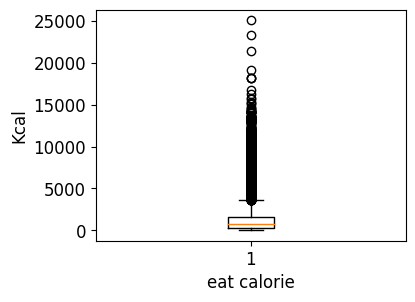

In [36]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots()

ax.boxplot(total_eat_np)
ax.set_xlabel('eat calorie')
ax.set_ylabel('Kcal')

plt.show()

In [37]:
df_eat.loc[df_eat['eat calorie'] < 100, 'eat calorie'] = np.nan # 100 칼로리는 너무 적으므로 이상치로 널값으로 대체

df_eat['eat calorie']=df_eat['eat calorie']*3 # 권장 칼로리가 약 2200칼로리인데 대부분 941 칼로리로 대부분 미달인 상태 하루 한끼 내지 두끼만 기록된 것으로 보임
                                              # 따락서

In [38]:
df_eat['eat calorie'].describe() # 그러면 아래와 같은 사분위값이 나오게 된다

count     6334.000000
mean      5324.085886
std       8128.988925
min        300.000000
25%       1080.000000
50%       2259.000000
75%       5103.000000
max      75252.000000
Name: eat calorie, dtype: float64

### Eat calorie 결측치 채우기

경우의 수  
1. 널값인데 해당일에 급식 칼로리정보가 있는 경우
2. 널값인데 해당일에 급식 칼로리정보가 없는 경우

### eat calorie는 널값인데 급식 칼로리정보가 있는 경우
급식칼로리 정보*3을 해서 널값을 채운다.

In [39]:
# 조건에 맞는 행을 한 번에 처리 (훨씬 더 효율적)
mask = pd.isna(df_eat["eat calorie"]) & pd.notna(df_eat["칼로리정보"])
df_eat.loc[mask, "eat calorie"] = df_eat.loc[mask, "칼로리정보"] * 1.5 * 3 # 급식에 있는 최소 칼로리 정보 보다 1.5배(많이 먹는다)하고 곱하기 3

### 큰 이상치 선별하기

In [40]:
upper_calorie_threshold=4000 # 60% 이상인 값을 상향 이상치로 설정
grouped = df_eat.groupby('ID')

In [41]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

def minmax_scaler(data, min_val=4000):
    data = np.array(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def MinMax_eatcalorie(df):
    # 유효한 데이터를 가진 행만 선택
    mask = df['eat calorie'].notna()
    df_eat_calorie = df[mask].reset_index(drop=True)
    
    # MinMaxScaler 적용 및 결과 병합
    df_eat_calorie['MinMaxScaler'] = minmax_scaler(df_eat_calorie['eat calorie'])
    
    # 원본 데이터와 병합
    result = pd.merge(
        df, df_eat_calorie, 
        on=['ID', 'collect_datetime', 'gender', 'grade', 'height', 'weight',
            'step count', 'burned calorie', 'eat calorie', 'sleep time', 
            '급식일자', '칼로리정보'],
        how='left'
    )
    return result

# 메인 처리 부분
df_total = pd.DataFrame()

for _, group in grouped:
    # MinMaxScaler 적용
    df_MinMax = MinMax_eatcalorie(group)
    
    # 임계값 초과 데이터 처리 (벡터화된 연산 사용)
    mask = (df_MinMax["eat calorie"] > upper_calorie_threshold) & (~pd.isna(df_MinMax["eat calorie"]))
    df_MinMax.loc[mask, "eat calorie"] = upper_calorie_threshold * (1 + df_MinMax.loc[mask, "MinMaxScaler"])
    
    # 결과 데이터프레임에 추가
    df_total = pd.concat([df_total, df_MinMax], axis=0)

### 원본 데이터하고 결합

In [42]:
df_total_merge=df_total[['ID','collect_datetime','gender','grade','eat calorie','급식일자','칼로리정보','MinMaxScaler']]

In [43]:
df_result = pd.merge(sorted_total_processor, df_total_merge, on=['ID','collect_datetime','gender','grade','급식일자','칼로리정보'],suffixes=('_original', '_changed'),how='left')

In [44]:
df_result.shape

(59514, 14)

## Step Count 전처리

In [45]:
df_result_filtered = df_result.dropna(subset=['step count'])
pd.options.display.float_format = '{:.2f}'.format
df_result['step count'].describe()
df_result_filtered['step count']=df_result_filtered['step count']+2000
df_result_filtered.isnull().sum()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\4159050594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_filtered['step count']=df_result_filtered['step count']+2000


ID                         0
collect_datetime           0
height                     0
weight                     0
step count                 0
eat calorie_original    1627
burned calorie             0
sleep time                 0
gender                    40
grade                     40
급식일자                    4265
칼로리정보                   4265
eat calorie_changed     1627
MinMaxScaler            1627
dtype: int64

In [46]:
df_result_filtered['step count'].describe()

count       8966.00
mean       13330.31
std       391525.67
min         2000.00
25%         2893.25
50%         5564.00
75%         9284.75
max     35691210.00
Name: step count, dtype: float64

In [47]:
#10000보 이상 걸음 걸이수에 대해 스무딩

upper_stepcount_threshold=10000
grouped = df_result_filtered.groupby('ID')

In [48]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

def minmax_scaler(data, min_val=10000):
    data = np.array(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def MinMax_step_count(df):
    # 유효한 데이터만 선택
    mask = df['step count'].notna()
    df_step_count = df[mask].reset_index(drop=True)
    
    # MinMaxScaler 적용
    df_step_count['stepMinMaxScaler'] = minmax_scaler(df_step_count['step count'])
    
    # 원본 데이터와 병합
    result = pd.merge(
        df, df_step_count, 
        on=['ID', 'collect_datetime', 'gender', 'grade', 'height', 'weight',
            'step count', 'burned calorie', 'sleep time', '급식일자', '칼로리정보'],
        how='left'
    )
    return result

# 메인 처리 부분
df_total = pd.DataFrame()

for _, group in grouped:
    # MinMaxScaler 적용
    df_MinMax = MinMax_step_count(group)
    
    # 임계값 초과 데이터 처리 (벡터화된 연산 사용)
    mask = (df_MinMax["step count"] > upper_stepcount_threshold) & df_MinMax["step count"].notna()
    df_MinMax.loc[mask, "step count"] = upper_stepcount_threshold * (1 + df_MinMax.loc[mask, "stepMinMaxScaler"])
    
    # 결과에 추가
    df_total = pd.concat([df_total, df_MinMax], axis=0)

In [49]:
df_total['step count'].describe()

count    8966.00
mean     6427.93
std      4039.39
min      2000.00
25%      2893.25
50%      5564.00
75%      9284.75
max     20000.00
Name: step count, dtype: float64

In [50]:
df_total_merge=df_total[['ID','collect_datetime','gender','grade','step count','급식일자','칼로리정보','stepMinMaxScaler']]
df_result2 = pd.merge(df_result, df_total_merge, on=['ID','collect_datetime','gender','grade','급식일자','칼로리정보'],suffixes=('_original', '_changed'),how='left')

## sleep time 전처리

540분(9시간 권장수면시간)을 상향 이상치로 설정

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 표시 형식 설정
pd.options.display.float_format = '{:.2f}'.format

# 임계값 설정
upper_sleeptime_threshold = 540  # 변수명을 수면 시간에 맞게 수정

def minmax_scaler(data, min_val=540):
    data = np.array(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def MinMax_sleeptime(df):
    # 유효한 수면 시간 데이터만 선택
    mask = df['sleep time'].notna()  # 'step count'가 아닌 'sleep time'으로 수정
    df_sleeptime = df[mask].reset_index(drop=True)
    
    # MinMaxScaler 적용
    df_sleeptime['sleeptimeMinMaxScaler'] = minmax_scaler(df_sleeptime['sleep time'])
    
    # 원본 데이터와 병합
    result = pd.merge(
        df, df_sleeptime, 
        on=['ID', 'collect_datetime', 'gender', 'grade', 'height', 'weight',
            'step count', 'burned calorie', 'sleep time', '급식일자', '칼로리정보'],
        how='left'
    )
    return result

# 메인 처리 부분
df_total2 = pd.DataFrame()

for _, group in grouped:
    # MinMaxScaler 적용
    df_MinMax = MinMax_sleeptime(group)
    
    # 임계값 초과 데이터 처리 (벡터화된 연산 사용)
    mask = (df_MinMax['sleep time'] > upper_sleeptime_threshold) & df_MinMax['sleep time'].notna()
    df_MinMax.loc[mask, 'sleep time'] = upper_sleeptime_threshold * (1 + df_MinMax.loc[mask, 'sleeptimeMinMaxScaler'])
    
    # 결과에 추가
    df_total2 = pd.concat([df_total2, df_MinMax], axis=0)

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\1990758565.py:14: RuntimeWarning: divide by zero encountered in divide
  return (data - min_val) / (max_val - min_val)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\1990758565.py:14: RuntimeWarning: invalid value encountered in divide
  return (data - min_val) / (max_val - min_val)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\1990758565.py:14: RuntimeWarning: divide by zero encountered in divide
  return (data - min_val) / (max_val - min_val)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\1990758565.py:14: RuntimeWarning: invalid value encountered in divide
  return (data - min_val) / (max_val - min_val)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\1990758565.py:14: RuntimeWarning: invalid value encountered in divide
  return (data - min_val) / (max_val - min_val)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\1990758565.py:14: RuntimeWarning: divide by zero encountered in divide
  return (data - min_val) / (ma

In [52]:
df_total2['sleep time'].describe()

count   8966.00
mean     481.92
std      143.03
min        0.00
25%      452.00
50%      480.00
75%      508.00
max     1080.00
Name: sleep time, dtype: float64

In [53]:
df_total_merge2=df_total2[['ID','collect_datetime','gender','grade','sleep time','급식일자','칼로리정보','sleeptimeMinMaxScaler']]
df_result3 = pd.merge(df_result2, df_total_merge2, on=['ID','collect_datetime','gender','grade','급식일자','칼로리정보'],suffixes=('_original', '_changed'),how='left')

### 수면시간 너무 많이 나오거나 너무 적게 나오는 값 결측치로 변환

In [54]:
# 수면 시간 720(12시간 이상)이상 널값으로 교체
def replace_above_threshold_with_null(df, column, threshold):
    df[column] = df[column].apply(lambda x: np.nan if x > threshold else x)
    return df

# 수면 시간 720(12시간 이상)이상 널값으로 교체
df_result3 = replace_above_threshold_with_null(df_result3, 'sleep time_changed', 720)

In [55]:
#160(2시간 40분 이하) 널값으로 교체
def replace_under_threshold_with_null(df, column, threshold):
    df[column] = df[column].apply(lambda x: 160 if x < threshold else x)
    return df

#160분(2시간 40분 이하) 널값으로 교체
df_result3 = replace_under_threshold_with_null(df_result3, 'sleep time_changed', 160)

##  burned calorie 전처리

축구 2시간 기준 칼로리 소모량 1700 kcal를 상향 이상치로 설정

In [56]:
df_result3['burned calorie'].describe()

count   59514.00
mean       56.94
std        70.70
min         0.04
25%        53.55
50%        53.55
75%        53.55
max      4477.51
Name: burned calorie, dtype: float64

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 표시 형식 설정
pd.options.display.float_format = '{:.2f}'.format

# 임계값 설정
upper_burn_threshold = 1700

def minmax_scaler(data, min_val=1700):
    data = np.array(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def MinMax_burned_calorie(df):  # 함수명을 기능에 맞게 변경
    # 유효한 burned calorie 데이터만 선택
    mask = df['burned calorie'].notna()
    df_burnedcalorie = df[mask].reset_index(drop=True)
    
    # MinMaxScaler 적용
    df_burnedcalorie['burnMinMaxScaler'] = minmax_scaler(df_burnedcalorie['burned calorie'])
    
    # 원본 데이터와 병합
    result = pd.merge(
        df, df_burnedcalorie, 
        on=['ID', 'collect_datetime', 'gender', 'grade', 'height', 'weight',
            'step count', 'burned calorie', 'sleep time', '급식일자', '칼로리정보'],
        how='left'
    )
    return result

# 메인 처리 부분
df_total3 = pd.DataFrame()

for _, group in grouped:
    # MinMaxScaler 적용
    df_MinMax = MinMax_burned_calorie(group)
    
    # 임계값 초과 데이터 처리 (벡터화된 연산 사용)
    mask = (df_MinMax['burned calorie'] > upper_burn_threshold) & df_MinMax['burned calorie'].notna()
    df_MinMax.loc[mask, 'burned calorie'] = upper_burn_threshold * (1 + df_MinMax.loc[mask, 'burnMinMaxScaler'])
    

    df_total3 = pd.concat([df_total3, df_MinMax], axis=0)  

In [58]:
df_total_merge3=df_total3[['ID','collect_datetime','gender','grade','burned calorie','급식일자','칼로리정보','burnMinMaxScaler']]
df_result4 = pd.merge(df_result3, df_total_merge3, on=['ID','collect_datetime','gender','grade','급식일자','칼로리정보'],suffixes=('_original', '_changed'),how='left')

In [59]:
# burned calorie 너무 작은 값(30kcal 이하는) (1000보 기준)결측치로 
def replace_above_threshold_with_null(df, column, threshold):
    df[column] = df[column].apply(lambda x: np.nan if x > threshold else x)
    return df

# 컬럼 'A'에서 2000 이상인 값을 널값으로 교체
df_result4 = replace_above_threshold_with_null(df_result4, 'burned calorie_changed', 2000)

In [60]:
df_result4

,ID,collect_datetime,height,weight,step count_original,eat calorie_original,burned calorie_original,sleep time_original,gender,grade,급식일자,칼로리정보,eat calorie_changed,MinMaxScaler,step count_changed,stepMinMaxScaler,sleep time_changed,sleeptimeMinMaxScaler,burned calorie_changed,burnMinMaxScaler
0,#AAGQKY,2022-07-14,148.00,45.15,NaN,1939.05,53.55,480.00,2,4,2022-07-14,430.90,1939.05,12.48,NaN,NaN,NaN,NaN,NaN,NaN
1,#AAGQKY,2022-07-15,148.00,45.15,NaN,1850.40,53.55,480.00,2,4,2022-07-15,411.20,1850.40,13.02,NaN,NaN,NaN,NaN,NaN,NaN
2,#AAGQKY,2022-07-16,148.00,45.15,NaN,NaN,53.55,480.00,2,4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#AAGQKY,2022-07-17,148.00,45.15,NaN,NaN,53.55,480.00,2,4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#AAGQKY,2022-07-18,148.00,45.15,NaN,2066.40,53.55,480.00,2,4,2022-07-18,459.20,2066.40,11.71,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59509,#ZZLSSL,2023-01-07,153.00,68.00,NaN,NaN,53.55,480.00,1,6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59510,#ZZLSSL,2023-01-08,153.00,68.00,NaN,NaN,53.55,480.00,1,6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59511,#ZZLSSL,2023-01-09,153.00,68.00,NaN,NaN,53.55,480.00,1,6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59512,#ZZLSSL,2023-01-10,153.00,68.00,NaN,NaN,53.55,480.00,1,6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 최종데이터세트 정리

In [61]:
df_final=df_result4[['ID','collect_datetime','gender','grade','height','weight','step count_changed','burned calorie_changed','eat calorie_changed','sleep time_changed']]
df_final.columns=['ID','collect_datetime','gender','grade','height','weight','step count','burned calorie','eat calorie','sleep time']

## 이상값으로 결측치로 변환했었던 것 아이디별 중앙값으로 채우기

In [62]:
df_final['eat calorie'] = df_final.groupby('ID')['eat calorie'].transform(lambda x: x.fillna(x.median()))
df_final['step count'] = df_final.groupby('ID')['step count'].transform(lambda x: x.fillna(x.median()))
df_final['sleep time'] = df_final.groupby('ID')['sleep time'].transform(lambda x: x.fillna(x.median()))
df_final['burned calorie'] = df_final.groupby('ID')['burned calorie'].transform(lambda x: x.fillna(x.median()))

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35144\2071872726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['eat calorie'] = df_final.groupby('ID')['eat calorie'].transform(lambda x: x.fillna(x.median()))
c:\Users\jaemin\anaconda3\envs\jm_main\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\jaemin\anaconda3\envs\jm_main\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\jaemin\anaconda3\envs\jm_main\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=

In [63]:
df_final=df_final.dropna().reset_index(drop=True)

In [64]:
len(df_final['ID'].unique())

260

In [65]:
df_final.to_csv(path+'\\data\\5.서울초_df_final.csv',encoding='cp949',index=False)